**Exploratory DataAnalysis**

Importing the Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Read the Data

In [6]:
df=pd.read_csv("Terrorism.csv", encoding='ISO-8859-1')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Describe the Dataset

In [7]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,985.000000,985.000000,999.000000,...,0.0,7.000000,0.0,0.0,51.000000,42.000000,999.000000,999.000000,999.000000,999.000000
mean,1.970402e+11,1970.348348,5.416416,15.010010,0.035035,221.876877,2.842843,32.890739,-66.406759,1.063063,...,NaN,116714.285714,NaN,NaN,2.352941,16.428571,-5.072072,-4.949950,0.205205,-4.130130
std,4.695814e+07,0.476686,2.965529,9.211711,0.183960,100.305285,3.152492,20.854443,53.907851,0.489394,...,NaN,131347.775372,NaN,NaN,0.820330,42.893028,4.505931,4.662722,0.783684,4.803043
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,11.000000,1.000000,-37.813187,-157.818968,1.000000,...,NaN,12000.000000,NaN,NaN,2.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.970050e+11,1970.000000,3.000000,7.000000,0.000000,217.000000,1.000000,34.096100,-106.619781,1.000000,...,NaN,47500.000000,NaN,NaN,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.970090e+11,1970.000000,5.000000,15.000000,0.000000,217.000000,1.000000,39.176086,-76.503519,1.000000,...,NaN,100000.000000,NaN,NaN,2.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000
75%,1.971030e+11,1971.000000,8.000000,23.000000,0.000000,217.000000,3.000000,41.524935,-56.187214,1.000000,...,NaN,105000.000000,NaN,NaN,2.000000,2.500000,0.000000,0.000000,0.500000,1.000000
max,1.971090e+11,1971.000000,12.000000,31.000000,1.000000,603.000000,12.000000,59.332788,144.962980,5.000000,...,NaN,400000.000000,NaN,NaN,5.000000,175.000000,1.000000,1.000000,1.000000,1.000000


Shape of the Dataset

In [8]:
df.shape

(999, 135)

Provides a Consice Summary of DataFrame

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 135 entries, eventid to related
dtypes: float64(59), int64(27), object(49)
memory usage: 1.0+ MB


Customizing and Renaming the Required Columns

In [10]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [11]:
df=df.rename(columns={'iyear':'year', 'imonth':'month', 'iday':'day', 'country_txt':'Country','region_txt':'Region','provstate':'State', 'attacktype1_txt':'attack', 'targtype1_txt':'targettype','targsubtype1_txt':'target', 'gname':'gang', 'weaptype1_txt':'weapon'})

In [12]:
df=df[['year','month','day','Country','Region','State','city','attack','targettype','target','gang','weapon']]

In [13]:
df

,year,month,day,Country,Region,State,city,attack,targettype,target,gang,weapon
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
994,1971,8,30,United Kingdom,Western Europe,Northern Ireland,Belfast,Assassination,Military,"Military Personnel (soldiers, troops, officers...",Irish Republican Army (IRA),Firearms
995,1971,8,30,United States,North America,Michigan,Pontiac,Bombing/Explosion,Transportation,Bus (excluding tourists),Ku Klux Klan,Explosives
996,1971,9,0,Cambodia,Southeast Asia,Phnom Penh,Phnom Penh,Assassination,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Unknown,Explosives
997,1971,9,0,Cambodia,Southeast Asia,Phnom Penh,Phnom Penh,Assassination,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Unknown,Explosives


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        999 non-null    int64 
 1   month       999 non-null    int64 
 2   day         999 non-null    int64 
 3   Country     999 non-null    object
 4   Region      999 non-null    object
 5   State       997 non-null    object
 6   city        999 non-null    object
 7   attack      999 non-null    object
 8   targettype  999 non-null    object
 9   target      960 non-null    object
 10  gang        999 non-null    object
 11  weapon      999 non-null    object
dtypes: int64(3), object(9)
memory usage: 93.8+ KB


Finding Missing Values

In [15]:
df.isnull()

,year,month,day,Country,Region,State,city,attack,targettype,target,gang,weapon
0,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,False,False,False,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

year           0
month          0
day            0
Country        0
Region         0
State          2
city           0
attack         0
targettype     0
target        39
gang           0
weapon         0
dtype: int64

Finding Coorelation b/w Pairs

In [17]:
df.corr()

<ipython-input-17-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,month,day
year,1.000000,-0.270707,0.019742
month,-0.270707,1.000000,0.021488
day,0.019742,0.021488,1.000000


from matplotlib import pyplot as plt
_df_0['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['month'].plot(kind='hist', bins=20, title='month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['day'].plot(kind='hist', bins=20, title='day')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='year', y='month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='month', y='day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['month']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('month')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['day']
  ys = series['month']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('day', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('day')
_ = plt.ylabel('month')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['day']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'day'}, axis=1)
              .sort_values('day', ascending=True))
  xs = counted['day']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('day', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('day')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['month'].plot(kind='line', figsize=(8, 4), title='month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['day'].plot(kind='line', figsize=(8, 4), title='day')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='year', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='month', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='day', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Finding the Missing Values

In [18]:
df['State']=df['State'].fillna('unknown')
df['target']=df['target'].fillna('unknown')
df

,year,month,day,Country,Region,State,city,attack,targettype,target,gang,weapon
0,1970,7,2,Dominican Republic,Central America & Caribbean,unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
994,1971,8,30,United Kingdom,Western Europe,Northern Ireland,Belfast,Assassination,Military,"Military Personnel (soldiers, troops, officers...",Irish Republican Army (IRA),Firearms
995,1971,8,30,United States,North America,Michigan,Pontiac,Bombing/Explosion,Transportation,Bus (excluding tourists),Ku Klux Klan,Explosives
996,1971,9,0,Cambodia,Southeast Asia,Phnom Penh,Phnom Penh,Assassination,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Unknown,Explosives
997,1971,9,0,Cambodia,Southeast Asia,Phnom Penh,Phnom Penh,Assassination,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Unknown,Explosives


Stat Description

In [19]:
df.describe()

,year,month,day
count,999.000000,999.000000,999.000000
mean,1970.348348,5.416416,15.010010
std,0.476686,2.965529,9.211711
min,1970.000000,0.000000,0.000000
25%,1970.000000,3.000000,7.000000
50%,1970.000000,5.000000,15.000000
75%,1971.000000,8.000000,23.000000
max,1971.000000,12.000000,31.000000


Visualization

<Axes: title={'center': 'Based on Attack type'}, xlabel='attack', ylabel='count'>

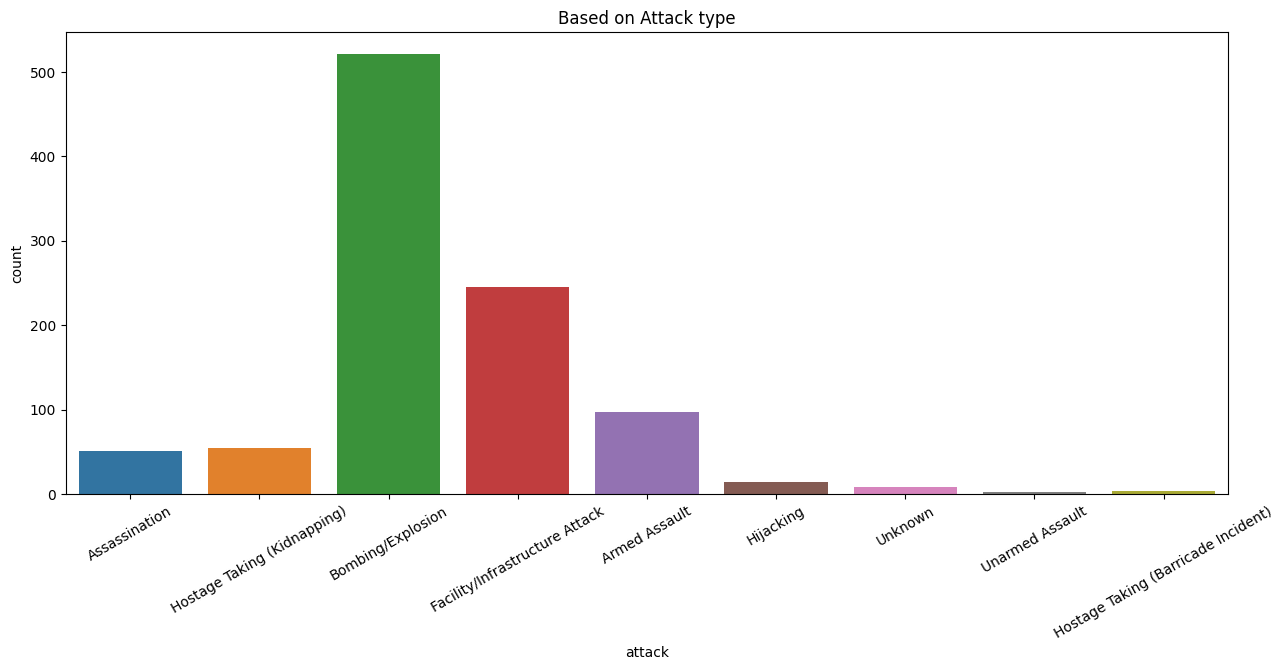

In [20]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=30)
plt.title('Based on Attack type')
sns.countplot(x=df['attack'])

<Axes: title={'center': 'Attacks by month'}, xlabel='month', ylabel='count'>

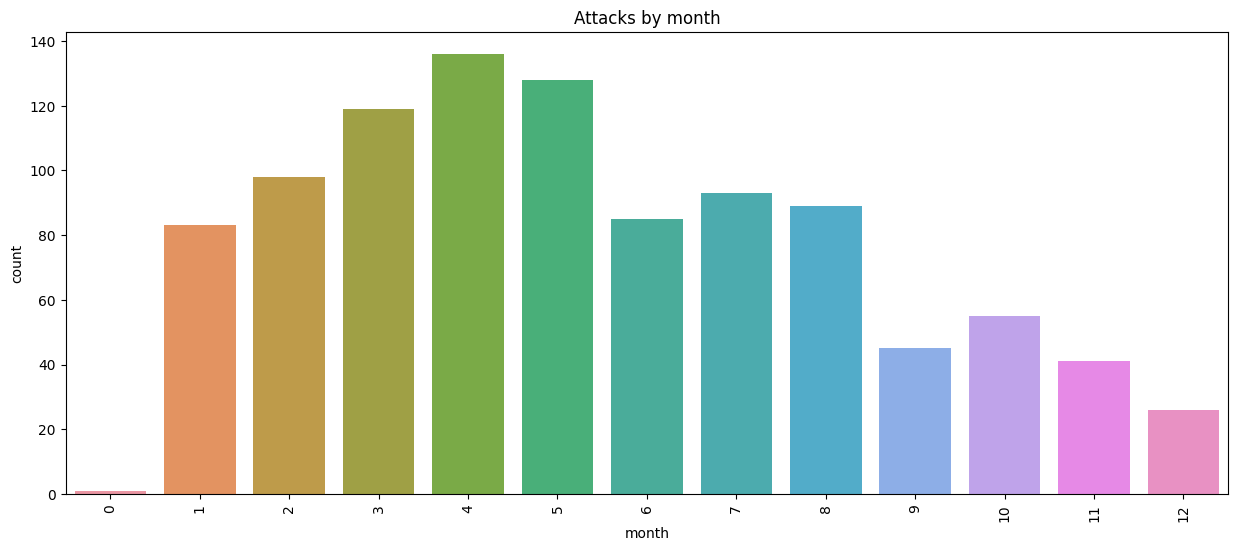

In [21]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.title('Attacks by month')
sns.countplot(x=df['month'])

<Axes: title={'center': 'Attacks on different days'}, xlabel='day', ylabel='count'>

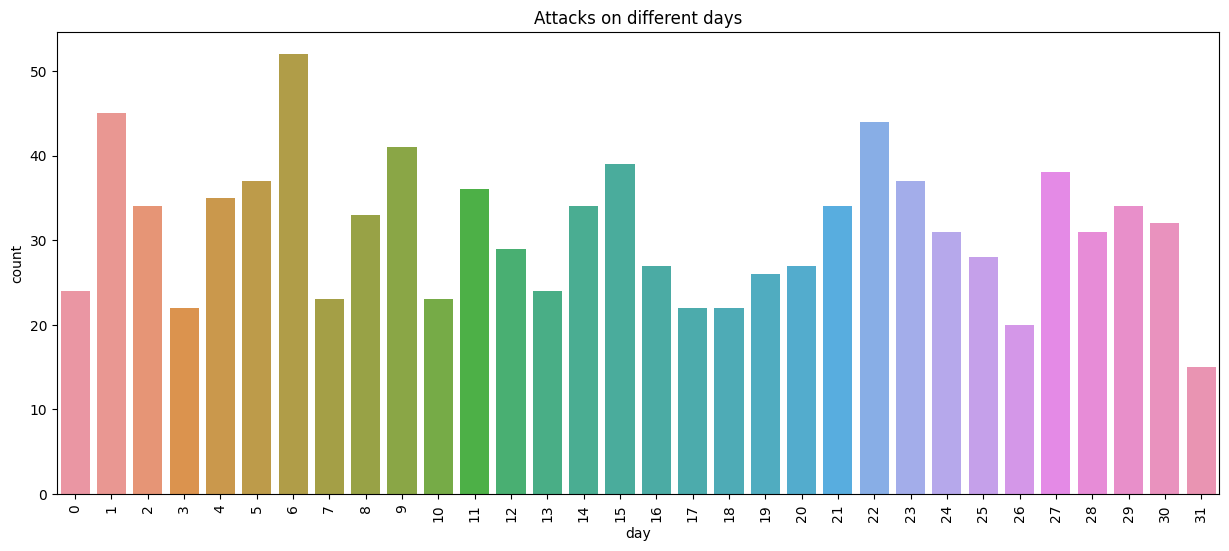

In [22]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.title('Attacks on different days')
sns.countplot(x=df['day'])

<Axes: title={'center': 'Types of weapon used'}, xlabel='weapon', ylabel='count'>

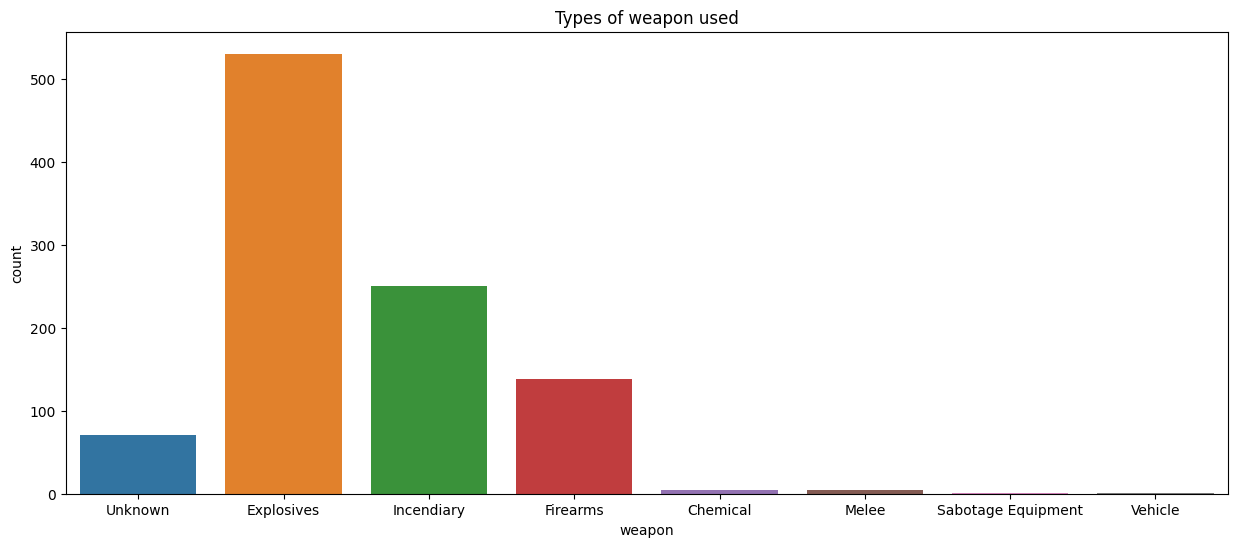

In [23]:
plt.figure(figsize=(15,6))
plt.title('Types of weapon used')
sns.countplot(x=df['weapon'])

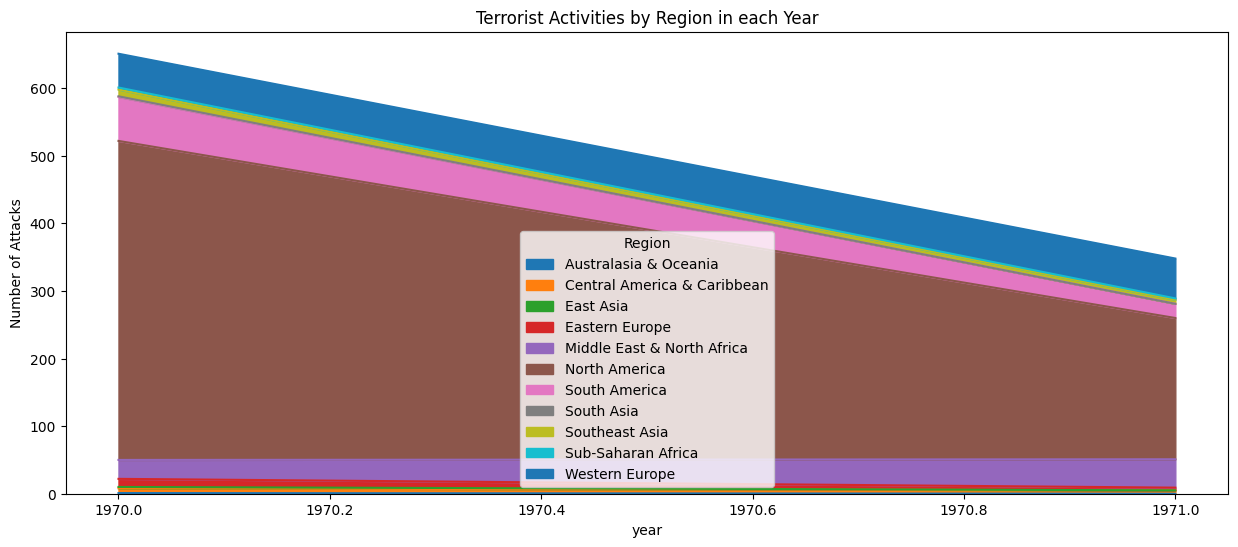

In [24]:
pd.crosstab(df.year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

<Axes: title={'center': 'Types of Target People'}, xlabel='targettype', ylabel='count'>

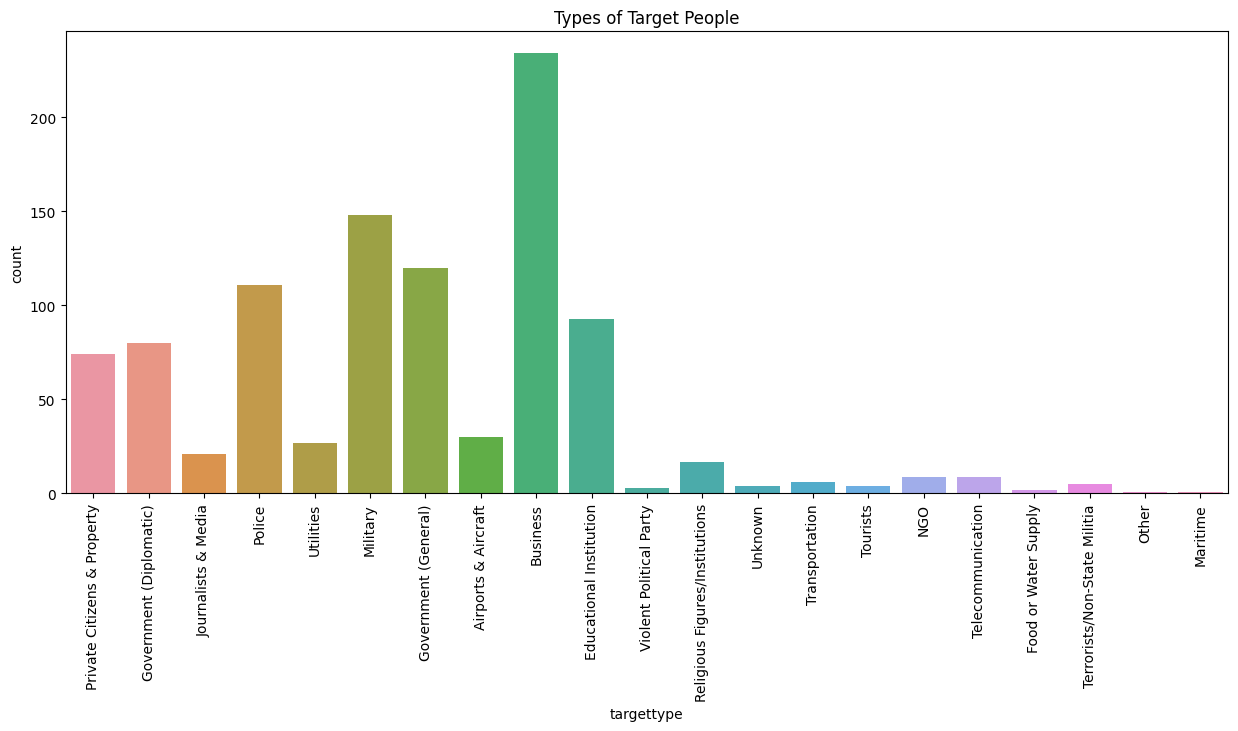

In [25]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.title('Types of Target People')
sns.countplot(x=df['targettype'])